In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate


In [3]:
path = Path(os.getcwd())/'data';path

PosixPath('/home/ubuntu/projects/dermai/data')

In [4]:
path.ls()

[PosixPath('/home/ubuntu/projects/dermai/data/Warts-Common-65.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Keratoacanthoma-91.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Pityriasis-Rosea-128.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Tinea-Ringworm-Versicolor-188.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Eczema-530.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Psoriasis-41.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Herpes-Zoster-389.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Tinea-Ringworm-Body-218.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Herpes-Zoster-68.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Drug-Eruptions-75.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Eczema-422.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Keratoacanthoma-191.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Eczema-1417.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Herpes-Zoster-345.jpg'),
 PosixPath

In [5]:
fnames = get_image_files(path)

In [6]:
fnames[:5]

[PosixPath('/home/ubuntu/projects/dermai/data/Warts-Common-65.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Keratoacanthoma-91.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Pityriasis-Rosea-128.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Tinea-Ringworm-Versicolor-188.jpg'),
 PosixPath('/home/ubuntu/projects/dermai/data/Eczema-530.jpg')]

In [7]:
np.random.seed(2)
pat = re.compile(r'([\w-]+)-\d+\.jpg$')

In [8]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms = get_transforms(),
                                  size=299, bs=64 // 2).normalize(imagenet_stats)

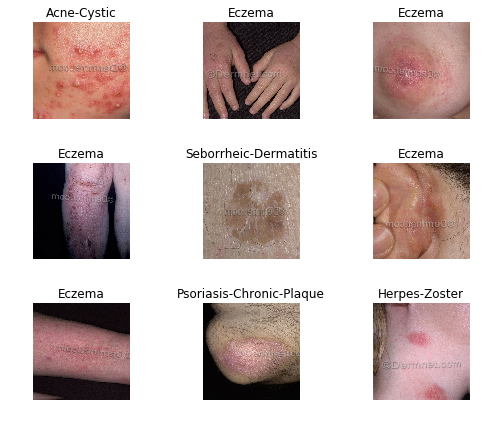

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
learn = create_cnn(data, models.resnet50, metrics = error_rate)

In [11]:
data.classes

['Warts-Common',
 'Keratoacanthoma',
 'Pityriasis-Rosea',
 'Tinea-Ringworm-Versicolor',
 'Eczema',
 'Psoriasis',
 'Herpes-Zoster',
 'Tinea-Ringworm-Body',
 'Drug-Eruptions',
 'Lichen-Planus',
 'Psoriasis-Chronic-Plaque',
 'Sun-Damaged-Skin',
 'Lichen-Simplex-Chronicus',
 'Urticaria-Acute',
 'Intertrigo',
 'Seborrheic-Dermatitis',
 'Malignant-Melanoma',
 'Pyogenic-Granuloma',
 'Molluscum-Contagiosum',
 'Herpes-Cutaneous',
 'Phototoxic-Reactions',
 'Psoriasis-Scalp',
 'Allergic-Contact-Dermatitis',
 'Erythema-Multiforme',
 'Perioral-Dermatitis',
 'Rosacea',
 'Warts-Plantar',
 'Tinea-Ringworm-Groin',
 'Mucous-Cyst',
 'Basal-Cell-Carcinoma-Lesion',
 'Stasis-Dermatitis-and-Ulcers',
 'Bullous-Pemphigoid',
 'Alopecia-Areata',
 'Sebaceous-Hyperplasia',
 'Epidermal-Cyst',
 'Lupus-Chronic-Cutaneous',
 'Hidradenitis-Suppurativa',
 'Acne-Cystic',
 'Psoriasis-Guttate',
 'Scabies',
 'CTCL-Cutaneous-T-Cell-Lymphoma',
 'Dermatofibroma',
 'Herpes-Type-1-Recurrent',
 'Psoriasis-Palms-Soles',
 'Genital-W

In [28]:
learn.unfreeze()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


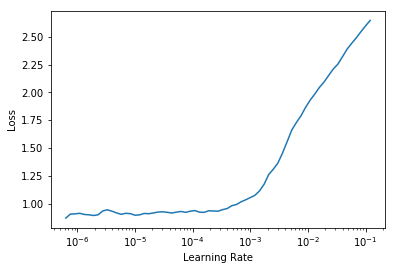

In [29]:
learn.lr_find();learn.recorder.plot()

In [22]:
learn.save('1')

In [19]:
learn.fit_one_cycle(5, max_lr=slice(3e-6, 1e-5))

Total time: 33:20
epoch  train_loss  valid_loss  error_rate
1      1.049026    1.157814    0.329263    (06:38)
2      1.025051    1.142395    0.325338    (06:40)
3      0.972424    1.127449    0.322721    (06:39)
4      0.990704    1.124205    0.318796    (06:41)
5      0.969748    1.120648    0.320977    (06:40)



In [23]:
interp = ClassificationInterpretation.from_learner(learn)

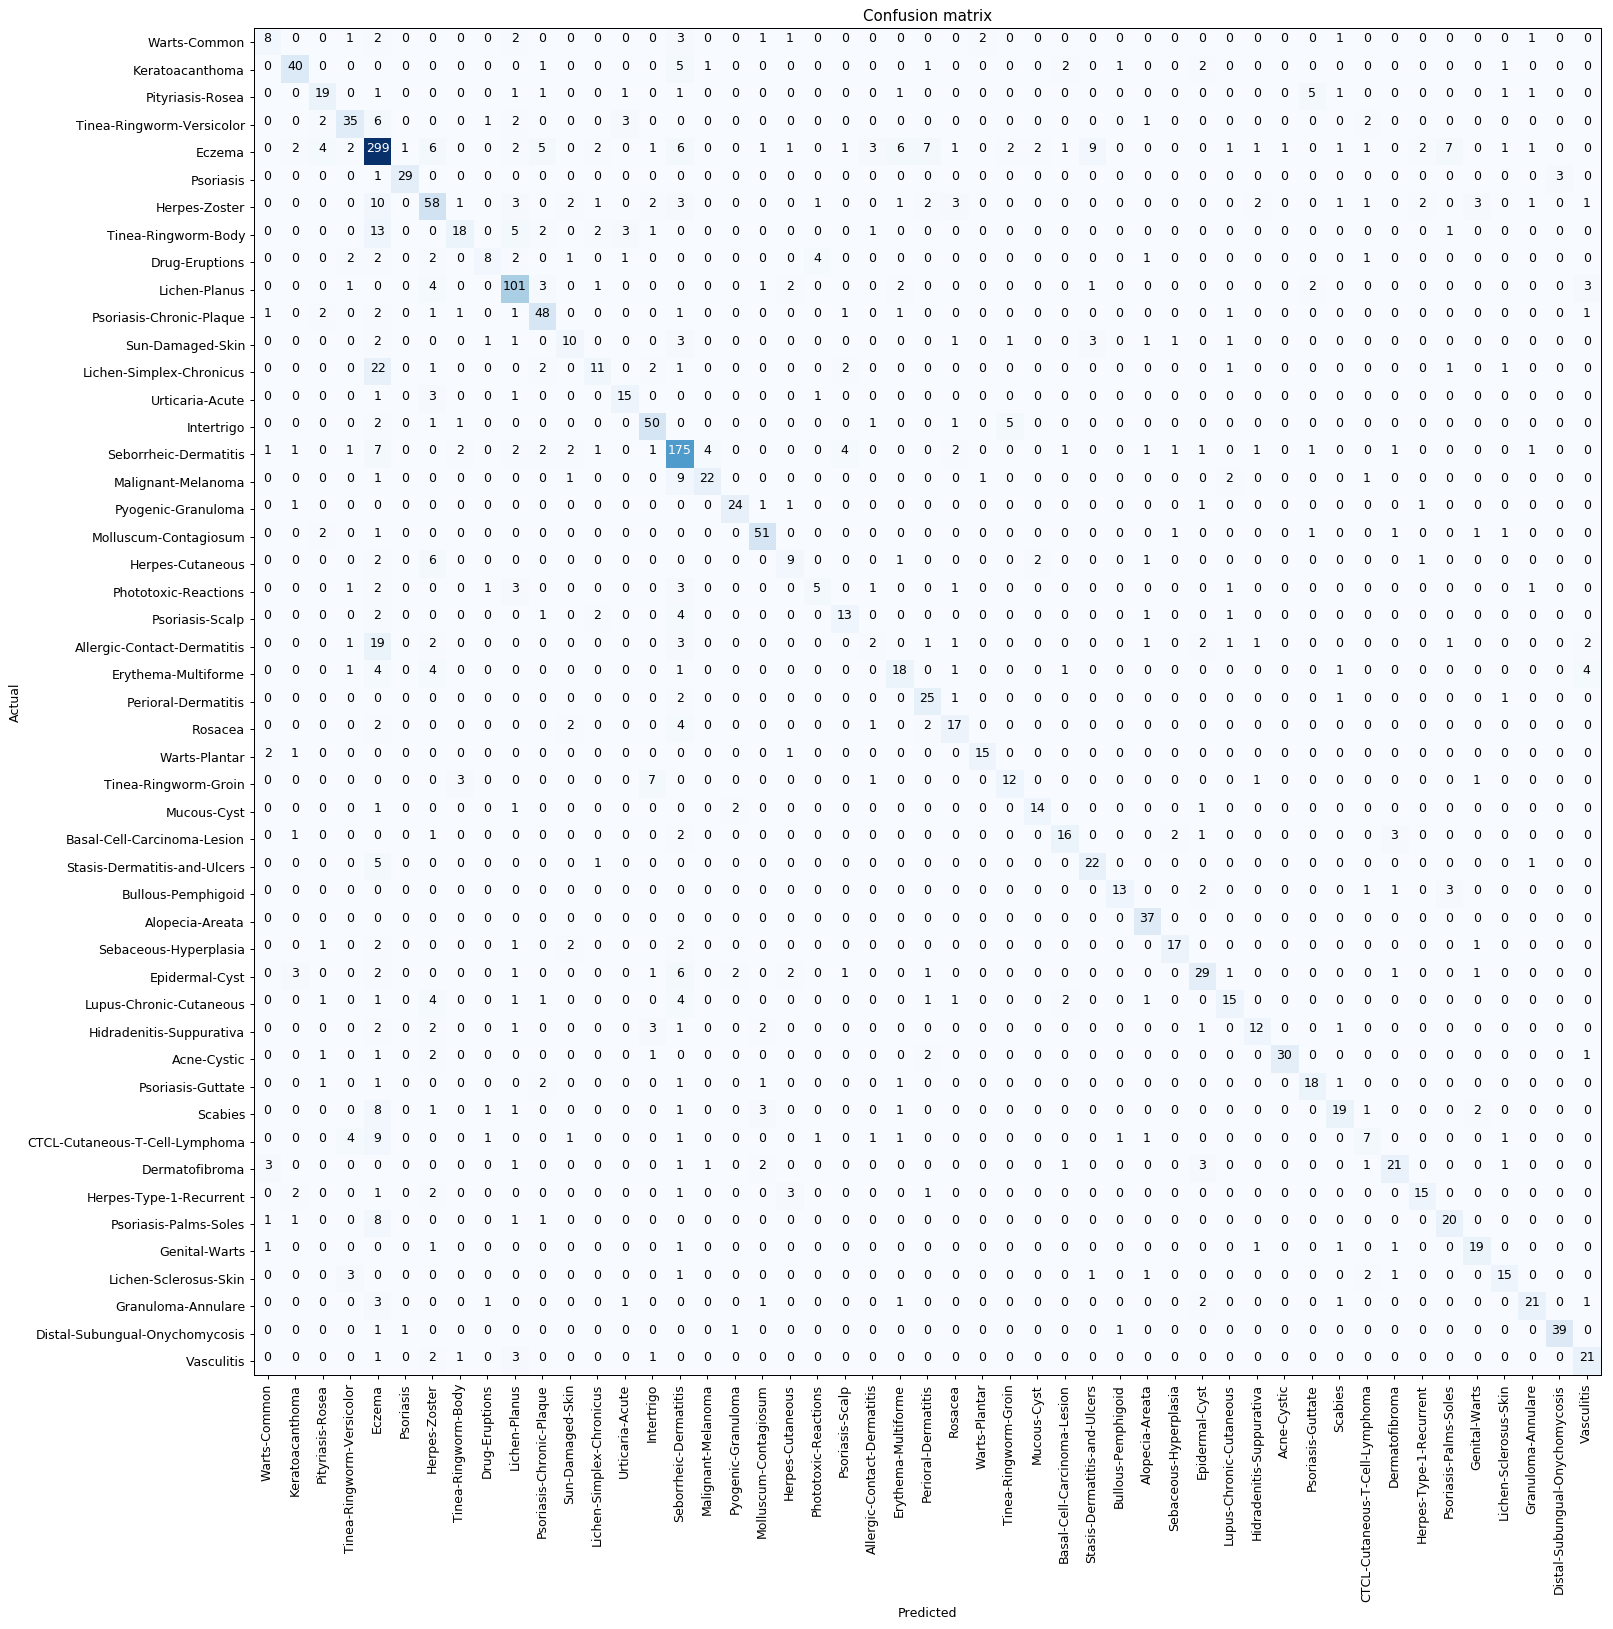

In [24]:
interp.plot_confusion_matrix(figsize=(18,18), dpi = 90)

In [25]:
interp.most_confused()

[('Lichen-Simplex-Chronicus', 'Eczema', 22),
 ('Allergic-Contact-Dermatitis', 'Eczema', 19),
 ('Tinea-Ringworm-Body', 'Eczema', 13),
 ('Herpes-Zoster', 'Eczema', 10),
 ('Eczema', 'Stasis-Dermatitis-and-Ulcers', 9),
 ('Malignant-Melanoma', 'Seborrheic-Dermatitis', 9),
 ('CTCL-Cutaneous-T-Cell-Lymphoma', 'Eczema', 9),
 ('Scabies', 'Eczema', 8),
 ('Psoriasis-Palms-Soles', 'Eczema', 8),
 ('Eczema', 'Perioral-Dermatitis', 7),
 ('Eczema', 'Psoriasis-Palms-Soles', 7),
 ('Seborrheic-Dermatitis', 'Eczema', 7),
 ('Tinea-Ringworm-Groin', 'Intertrigo', 7),
 ('Tinea-Ringworm-Versicolor', 'Eczema', 6),
 ('Eczema', 'Herpes-Zoster', 6),
 ('Eczema', 'Seborrheic-Dermatitis', 6),
 ('Eczema', 'Erythema-Multiforme', 6),
 ('Herpes-Cutaneous', 'Herpes-Zoster', 6),
 ('Epidermal-Cyst', 'Seborrheic-Dermatitis', 6),
 ('Keratoacanthoma', 'Seborrheic-Dermatitis', 5),
 ('Pityriasis-Rosea', 'Psoriasis-Guttate', 5),
 ('Eczema', 'Psoriasis-Chronic-Plaque', 5),
 ('Tinea-Ringworm-Body', 'Lichen-Planus', 5),
 ('Intertrig